In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


print(tf.__version__)

url = '/content/tmpsVoyage.csv'
column_names = ['tx', 'nbr', 'txVaccin', 'txQuar', 'txInfect',
                'tmpsInfect', 'tmpsQuar', 'tmpsVoyage']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

unit = 'tmpsVoyage'

2.8.2


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tx,1711.0,134.900058,9.324888e+01,1.00,102.00,110.00,116.000,648.00
nbr,1711.0,150.000000,0.000000e+00,150.00,150.00,150.00,150.000,150.00
txVaccin,1711.0,0.200000,2.776369e-17,0.20,0.20,0.20,0.200,0.20
txQuar,1711.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.000,0.00
txInfect,1711.0,0.500000,0.000000e+00,0.50,0.50,0.50,0.500,0.50
tmpsInfect,1711.0,4.000000,0.000000e+00,4.00,4.00,4.00,4.000,4.00
tmpsQuar,1711.0,1.000000,0.000000e+00,1.00,1.00,1.00,1.000,1.00
tmpsVoyage,1711.0,10.513314,5.536515e+00,1.01,5.53,10.61,15.305,19.98


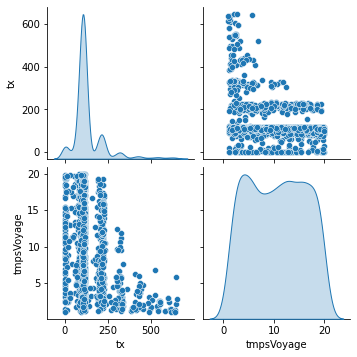

In [ ]:
sns.pairplot(train_dataset[['tx', unit]], diag_kind='kde')


In [ ]:
#coder fct pour supprimer les valeurs trop absurdes
train_features = train_dataset.copy()
test = train_features.pop(unit)
toto = train_features.pop('tx')
l1 = test.values.tolist()
l2 = toto.values.tolist()

print(len(l1))

fin = []

for i in range (0,20):
  a = i
  b = a + 1

  l = []
  for j in range(len(l1)):
    p = l1[j]
    if (p >= a) and (p <= b):
      l.append(j)
    
  
  sumi = 0
  
  for u in l:
    sumi = sumi + l2[u]
  
  if len(l) == 0:
    print()
  else:
    sumi = sumi / len(l)
    #print(sumi)
    error = sumi / 3

    
   
    for k in l:
      if (l2[k] < sumi + error) and (l2[k] > sumi - error):
        fin.append(k)

print(fin)

1711

[75, 244, 370, 403, 425, 546, 569, 727, 804, 825, 833, 876, 970, 1017, 1020, 1194, 1292, 1403, 1434, 1599, 28, 163, 254, 291, 302, 450, 510, 515, 559, 563, 634, 650, 816, 819, 832, 870, 913, 963, 1029, 1078, 1187, 1227, 1241, 1246, 1253, 1304, 1332, 1343, 1363, 1526, 1612, 24, 25, 73, 159, 200, 273, 369, 409, 485, 494, 557, 643, 665, 700, 717, 793, 878, 976, 1204, 1255, 1268, 1273, 1278, 1284, 1296, 1298, 1349, 1356, 1437, 1460, 1593, 1623, 1667, 34, 41, 59, 89, 98, 234, 255, 268, 269, 279, 337, 359, 396, 436, 459, 598, 666, 682, 708, 722, 733, 895, 909, 912, 916, 925, 927, 949, 950, 1009, 1037, 1074, 1105, 1162, 1250, 1260, 1270, 1283, 1324, 1358, 1394, 1406, 1414, 1513, 1517, 1583, 1590, 1689, 1695, 59, 101, 119, 131, 168, 247, 263, 276, 282, 288, 308, 322, 361, 372, 395, 479, 486, 544, 591, 611, 614, 647, 667, 742, 770, 789, 790, 826, 837, 846, 905, 941, 950, 966, 984, 1023, 1041, 1085, 1089, 1094, 1235, 1257, 1354, 1370, 1389, 1399, 1455, 1473, 1486, 1510, 1516, 1577, 1596, 1

In [ ]:
data = []
for j in fin:
  data.append([l1[j],l2[j]])

df = pd.DataFrame(data, columns = [unit, 'tx'])

In [ ]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
tmpsVoyage,1188.0,11.958350,5.085354,1.16,7.9125,12.46,16.395,19.98
tx,1188.0,114.699495,34.808681,73.00,103.0000,109.00,113.000,390.00


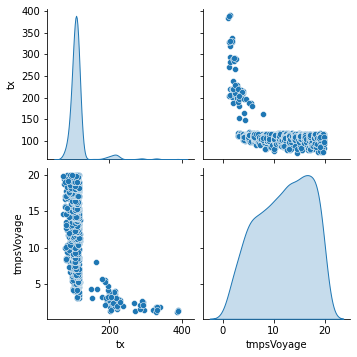

In [ ]:
sns.pairplot(df[['tx', unit]], diag_kind='kde')


In [ ]:
dataset = df.copy()
dataset.tail()

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tmpsVoyage,950.0,11.931642,5.061917,1.16,7.995,12.4,16.335,19.98
tx,950.0,115.134737,36.135513,74.00,103.000,109.0,113.000,390.00


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('tx')
test_labels = test_features.pop('tx')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

horsepower = np.array(train_features[unit])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features[unit],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 1min 5s, sys: 4.63 s, total: 1min 10s
Wall time: 1min 4s


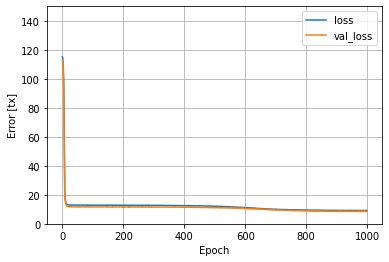

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 150])
  plt.xlabel('Epoch')
  plt.ylabel('Error [tx]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

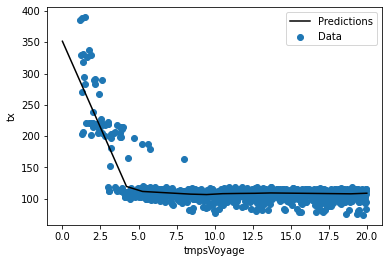

In [ ]:
x = tf.linspace(0.0, 20, 20)
y = dnn_horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features[unit], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(unit)
  plt.ylabel('tx')
  
  plt.legend()

plot_horsepower(x, y)

In [ ]:
dnn_horsepower_model.evaluate(
    test_features[unit], test_labels,
    verbose=0)

8.36691951751709

In [ ]:
dnn_horsepower_model.predict([80])

array([[10010.445]], dtype=float32)

In [ ]:

dnn_horsepower_model.save('/content/model_tmpsVoyage.h5')